<img src="https://is1-ssl.mzstatic.com/image/thumb/Purple122/v4/05/e7/67/05e76784-3364-b535-7e20-b3f4946a56b6/AppIcon-0-0-1x_U007emarketing-0-0-0-7-0-0-sRGB-0-0-0-GLES2_U002c0-512MB-85-220-0-0.png/434x0w.webp" style="height: 150px; text-align: center">

<hr style="border: 2px solid red">
<h1 style="text-align: center">Test Technique Data Scientist</h1>
<h2 style="text-align: center">Mesure de la dérive</h2>
<hr style="border: 2px solid red">

# Contexte

La **dérive** en apprentissage automatique (ou **"drift"** en anglais) fait référence à un **changement dans les données d'entrée ou de sortie d'un modèle** de machine learning **après son entraînement initial**. Cela peut se produire lorsque les données utilisées pour entraîner le modèle ne **reflètent plus la réalité**, ou lorsque **les conditions du problème changent de manière significative**.

La dérive des données peut affecter la précision du modèle de manière significative et peut entraîner des erreurs coûteuses dans les prévisions ou les décisions basées sur le modèle. Par conséquent, **il est important de surveiller régulièrement les performances du modèle** et de le mettre à jour en fonction des nouveaux jeux de données ou des nouvelles conditions du problème.

# Objectif

Dans ce test, vous allez implémenter des métriques permettant de mesurer la dérive d'un modèle dans un usecase de **e-commerce** où nous essayons de prédire le **panier total** (variable **`TotalCart`** : chiffre d'affaire total d'un client sur la période donnée) des clients en fonction des variables suivantes:
* **`Age`** : âge du client en années.
* **`Seniority`** : ancienneté du client en années.
* **`Orders`** : Nombre de commandes effectuées sur la période précédente.
* **`Items`** : Nombre d'items commandés sur la période précédente.
* **`AverageDiscount`** : Réduction moyenne accordée au client sur la période précédente en pourcentage.
* **`TopCategory`** : Catégorie de produits favorite du client.
* **`BrowsingTime`** : Temps total passé sur le site web sur la période précédente en secondes.
* **`EmailsOpened`** : Nombre de mails marketing ouverts par le client sur la période précédente.
* **`SupportInteractions`** : Nombre d'intéractions que le client a eu avec le service client sur la période précédente.

Le jeu de données est décomposé en 4 périodes correspondant aux 4 trimestres de l'année 2022. Vous trouverez les données correspondant à chaque période dans les fichiers `period_0.csv`, `period_1.csv`, ..., `period_3.csv`.

Vous allez d'abord **entraîner et évaluer un modèle de machine learning** sur les données de la **période 0**. On supposera que ce modèle sera utilisé pour effectuer les prédictions de panier total sur toute l'année 2022.

Ensuite, vous devrez **implémenter des métriques de dérive** qui vous seront données et **effectuer une analyse** de celles-ci.

# Entraînement du modèle

* **Entraînez et validez** deux ou trois modèles de votre choix sur les données de la période 0. 

**Conseils**

* Vous serez évalué sur votre **rigueur** et non sur les performances du modèle.


* Il n'est pas nécessaire de faire une analyse exploratoire des données.


* Il n'est pas nécessaire de faire de recherche d'hyperparamètres optimaux non plus mais vous pouvez le faire si vous le souhaitez.

L'objectif étant de prédire une **valeur continue**, nous faisons face à un problème de **régression**. De ce fait, la **Régression Linéaire**, les **Forêts Aléatoires**, et le **Perceptron Multi-Couche** sont 3 modèles adaptés à notre cas d'usage. Les données du premier trimestre 2022 seront donc importées et prétraitées avant l'entraînement et l'évaluation de ces modèles d'apprentissage.

## Les données

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd

In [2]:
# Importation des données
PATH = Path() # répertoire contenant les données (courant)

def read_data(file="period_0.csv"):
    path = PATH / file
    try:
        df = pd.read_csv(path)
        print(f"Importation de '{path}' réussie.")
        return df
    except FileNotFoundError:
        print(f"Fichier '{path}' introuvable.")
    except PermissionError:
        print(f"Accès non autorisé à '{path}'.")
    except TypeError:
        print("Input de type invalide.")
    except Exception as e:
        print("Erreur innatendue :", e)
    return

In [3]:
# Données de la période 0
df = read_data("period_0.csv")
df.head()

Importation de 'period_0.csv' réussie.


,Age,Seniority,Orders,Items,AverageDiscount,TopCategory,BrowsingTime,EmailsOpened,SupportInteractions,TotalCart
0,21,2,4,7,0.14,"Clothing,Shoes & Jewelry",68.473629,3,2,34.00
1,22,0,4,5,0.50,Toys & Games,29.258063,1,0,28.28
2,22,1,2,6,0.37,"Health, Household & Baby Care",11.515517,0,0,19.33
3,19,0,2,8,0.60,Toys & Games,74.495861,1,0,26.83
4,25,1,1,5,0.58,Toys & Games,1.682705,2,1,17.67


In [4]:
# Variables explicatives et variable cible
features = df.columns[:-1]
target = df.columns[-1]

X, y = df[features], df[target]

In [5]:
# Types de variables
df.dtypes

Age                      int64
Seniority                int64
Orders                   int64
Items                    int64
AverageDiscount        float64
TopCategory             object
BrowsingTime           float64
EmailsOpened             int64
SupportInteractions      int64
TotalCart              float64
dtype: object

In [6]:
# Variables numériques et catégorielles
num_features = df.drop(target, axis=1).select_dtypes(include=np.number).columns
cat_features = df.drop(target, axis=1).select_dtypes(exclude=np.number).columns

In [7]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Prétraitement des données : standardisation et encodage
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(), cat_features)
])

prep_X_train = preprocessor.fit_transform(X_train)

# Inférence sur le jeu test
prep_X_test = preprocessor.transform(X_test)

## Les modèles

In [9]:
# Modèles
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Mesures de performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [10]:
# Entraînement et évaluation 
models = {
    "lr": LinearRegression(),
    "rf": RandomForestRegressor(n_estimators=20, max_depth=20, random_state=42),
    "mlp": MLPRegressor(hidden_layer_sizes=(32, 3), batch_size=64, max_iter=2000, random_state=42)
}

for i, model in enumerate(models.values()):
    model.fit(prep_X_train, y_train)
    y_train_pred = model.predict(prep_X_train)
    y_test_pred = model.predict(prep_X_test)
    
    if i != 0: print("-" * 25)
    print(model.__class__.__name__)
    
    print("MAE")
    train_MAE = mean_absolute_error(y_train, y_train_pred)
    test_MAE = mean_absolute_error(y_test, y_test_pred)
    print("  - Train: {:.3f}".format(train_MAE))
    print("  - Test:  {:.3f}".format(test_MAE))
    
    print("MSE (RMSE)")
    train_MSE = mean_squared_error(y_train, y_train_pred)
    test_MSE = mean_squared_error(y_test, y_test_pred)
    print("  - Train: {:.3f} ({:.3f})".format(train_MSE, np.sqrt(train_MSE)))
    print("  - Test:  {:.3f} ({:.3f})".format(test_MSE, np.sqrt(test_MSE)))

LinearRegression
MAE
  - Train: 4.855
  - Test:  3.401
MSE (RMSE)
  - Train: 74.894 (8.654)
  - Test:  18.326 (4.281)
-------------------------
RandomForestRegressor
MAE
  - Train: 0.650
  - Test:  1.596
MSE (RMSE)
  - Train: 1.272 (1.128)
  - Test:  4.995 (2.235)
-------------------------
MLPRegressor
MAE
  - Train: 0.075
  - Test:  0.219
MSE (RMSE)
  - Train: 0.010 (0.098)
  - Test:  0.386 (0.621)


Avec notre configuration d'hyperparamètres, la Régression Linéaire et le Random Forest conduisent à des performances moins satisfaisantes que celles du **MLP**. Ce dernier modèle étant parvenu à une meilleure minimisation des fonctions de coût sera donc pris comme modèle de référence pour la suite.

* **Entrainez votre modèle sur toute la période 0** puis **testez votre modèle** sur les données des **périodes 1, 2 et 3**. Comment évolue la performance du modèle?

## Entraînement sur la période 0

In [11]:
# Modèle : MLP
model = models["mlp"]

# Réajustement du préprocesseur sur l'ensemble des données
prep_X = preprocessor.fit_transform(X)

# Entraînement
model.fit(prep_X, y)

MLPRegressor(batch_size=64, hidden_layer_sizes=(32, 3), max_iter=2000,
             random_state=42)

## Evaluation sur les périodes 1, 2 & 3

In [12]:
# Fonction de preprocessing des données test après leur importation
def prepare(df, features=features, target=target, preprocessor=preprocessor):
    try:
        X, y = df[features], df[target]
        prep_X = preprocessor.transform(X)
        return prep_X, y
    except KeyError as e:
        print(f"Colonne '{e.args[0]}' introuvable.")
    except ValueError as e:
        print("Valeur invalide :", e.args[0])
    except Exception as e:
        print("Erreur innatendue :", e)
    return

In [13]:
# Données des autres périodes
dfs = [read_data(f"period_{i}.csv") for i in range(1, 4)]
print()

# Combinons avec les données de référence
dfs.insert(0, df)

# Evaluation du modèle sur toutes les périodes
for i, df in enumerate(dfs):
    prepared = prepare(df)
    if prepared is not None:
        prep_X, y = prepared
        y_pred = model.predict(prep_X)
        MAE = mean_absolute_error(y, y_pred)
        MSE = mean_squared_error(y, y_pred)

        print("-" * 4, f"T{i+1}", "-" * 4)
        print("MAE:  {:.3f}".format(MAE))
        print("RMSE: {:.3f}\n".format(np.sqrt(MSE)))

Importation de 'period_1.csv' réussie.
Importation de 'period_2.csv' réussie.
Importation de 'period_3.csv' réussie.

---- T1 ----
MAE:  0.046
RMSE: 0.079

---- T2 ----
MAE:  7.729
RMSE: 8.257

---- T3 ----
MAE:  8.282
RMSE: 8.669

---- T4 ----
MAE:  11.073
RMSE: 12.063



Nous observons une **dégradation des performances du modèle au fil des périodes**, et notamment au cours du quatrième trimestre de l'année 2022. Alors qu'il s'est plutôt bien ajusté au jeu d'entraînement, les prédictions sur les nouvelles données sont de plus en plus décalées de la réalité.

# Mesure de la dérive de variables catégorielles

Pour deux distributions de probabilités discrètes $P$ et $Q$, la **divergence de Kullback–Leibler** de $P$ par rapport à $Q$ est définie par:

$$D_\text{KL}(P \parallel Q) = \sum_{x\in\mathcal{X}} P(x) \log\left(\frac{P(x)}{Q(x)}\right)$$


On définit la **divergence de Jensen-Shannon** comme une version lisse et symétrique de la divergence de Kullback-Leibler donnée par la formule suivante:

$${\rm JSD}(P \parallel Q)= \frac{1}{2}D(P \parallel M)+\frac{1}{2}D(Q \parallel M)$$

où $M=\frac{1}{2}(P+Q)$

### Exemple de calcul de $D_\text{KL}(P \parallel Q)$ : 

Soient $P$ =`[0.2, 0.3, 0.5]` et $Q$ =`[0.2, 0.4, 0.4]` deux vecteurs définissant une loi de probabilité discrete. Alors : 

$$
\begin{equation}
\begin{split}
D_\text{KL}(P \parallel Q) & = P(0) \log\left(\frac{P(0)}{Q(0)}\right)
                             + P(1) \log\left(\frac{P(1)}{Q(1)}\right)
                             + P(2) \log\left(\frac{P(2)}{Q(2)}\right)\\ \\
                           & = 0.2 \log\left(\frac{0.2}{0.2}\right)
                             + 0.3 \log\left(\frac{0.3}{0.4}\right)
                             + 0.5 \log\left(\frac{0.5}{0.4}\right) \\ \\
                           & = 0.02526...
\end{split}
\end{equation}
$$

### Exercice

* Implémenter des fonctions nommées **`KLDivergence(P, Q)`** et **`JSDivergence(P, Q)`** permettant de calculer les métriques définies ci-dessus.

**Conseils**:
* Utiliser la librairie Numpy permettant de facilement effectuer des calculs d'algèbre linéaire.

In [14]:
P = np.array([0.2, 0.3, 0.5])
Q = np.array([0.2, 0.4, 0.4])

def KLDivergence(P, Q):
    return sum(P * np.log(P / Q))

def JSDivergence(P, Q):
    M = (P + Q) / 2
    return (KLDivergence(P, M) + KLDivergence(Q, M)) / 2

* Lancer la cellule suivante pour tester votre fonction.

In [15]:
print("K-L Divergence:", KLDivergence(P, Q))
print("J-S Divergence:", JSDivergence(P, Q))

K-L Divergence: 0.02526715392157057
J-S Divergence: 0.006367198333995731


# Mesure de la dérive de variables quantitatives

Soit $P$ une mesure empirique d'échantillons $X_1, \ldots, X_n
$ et $Q$ une mesure empirique d'échantillons $Y_1, \ldots, Y_n$, on définit la **Distance de Wasserstein** d'ordre $p$ par la fonction suivante :

$$W_p(P, Q) = \left( \frac{1}{n}\sum_{i=1}^n \|X_{(i)} - Y_{(i)}\|^p \right)^{1/p}$$

où $X_{(1)}, \ldots, X_{(n)}$ et $Y_{(1)}, \ldots, Y_{(n)}$ sont les [**statistiques d'ordre**](https://en.wikipedia.org/wiki/Order_statistic#Notation_and_examples) des échantillons $X$ et $Y$ et $p$ un nombre entier positif.

## Exercice

* Implémenter une fonction nommée **`WassersteinDistance(X, Y, p)`** permettant de calculer cette métrique à l'ordre **`p`** à partir de **deux échantillons** **`X`** et **`Y`** que l'on supposera de même longueur.

**Conseils**:
* Vous pouvez trier les échantillons pour obtenir les statistiques d'ordre.

In [16]:
def WassersteinDistance(X, Y, p=2): # distance euclidienne par défaut
    X.sort(), Y.sort()
    return ((1 / len(X)) * sum(abs(X - Y)**p))**(1 / p)

* Lancer la cellule suivante pour tester votre fonction.

In [17]:
X = np.random.beta(2, 6, 100)
Y = np.random.beta(3, 6, 100)

WassersteinDistance(X, Y, p=2)

0.09489326344100384

# Étude de la dérive du modèle

* En vous appuyant sur les métriques définies précédemment, illustrez et analysez visuellement la **dérive des données** ainsi que **la dérive du modèle** sur les périodes **1 à 3**. 


* Commenter les visualisations et déterminer si le modèle doit être mis à jour ou si sa performance est toujours acceptable. 

**Conseils**:
* Vous serez évalué sur **la rigueur et le soin** que vous donnerez à votre analyse, et sur **vos capacités à synthéthiser votre étude**. Vous ne serez pas évalué sur vos conclusions.


* Vous pouvez normaliser les données par rapport aux **moyennes et variances que vous calculerez sur la période 0** pour que les distances de Wasserstein pour différentes variables soient facilement comparables.

## Dérive des variables catégorielles

### Obervation des données

Nous allons dans cette partie nous intéresser à la distribution de la variable 'TopCategory' au fil des 4 périodes.

In [18]:
# Indicateur du trimestre dans chaque dataset
for i, df in enumerate(dfs): df["Period"] = i+1

# Données des 4 trimestres
combined_df = pd.concat(dfs, ignore_index=True)

# Distribution de la variable 'TopCategory' au trimestre 1
P = dfs[0]["TopCategory"].value_counts(normalize=True)

# Données dans l'ordre décroissant des produits favoris au trimestre T1
combined_df.sort_values(by="TopCategory",
                        key=lambda x: x.map({cat: j for j, cat in enumerate(P.index)}),
                        inplace=True)

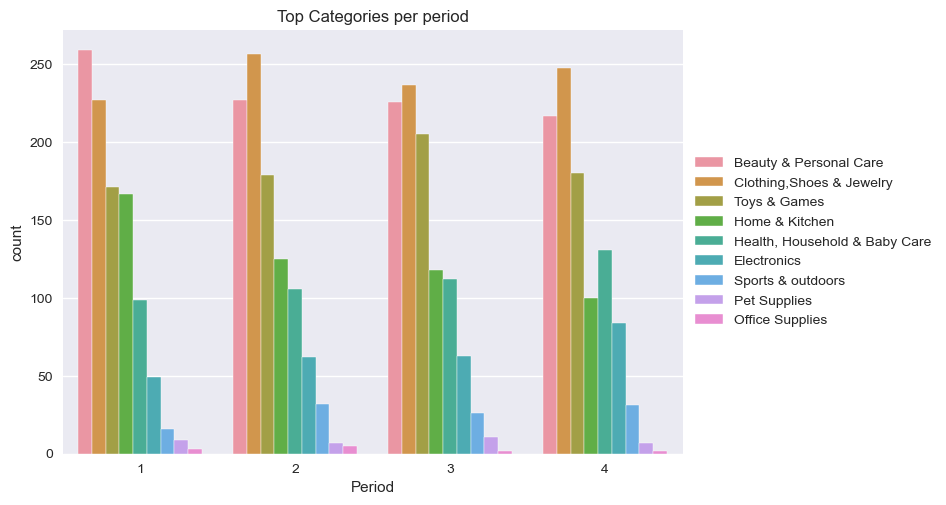

In [19]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
sns.set_style("darkgrid")

# Catégories de produits (ordre décroissant des favoris en T1)
categories = P.index

# Consommation de chaque produit par trimestre
plots = []
for cat in categories:
    # Création du graphique (presque transparent)
    sns.countplot(data=combined_df, x="Period", hue="TopCategory", alpha=.2)
    
    # Mise en relief d'une catégorie en particulier
    for container in plt.gca().containers:
        if container.get_label() == cat:
            for bar in container.get_children():
                bar.set_alpha(1)

    # Titre, légende et sauvegarde
    plt.title("Top Categories per period")
    plt.legend(loc="center left", bbox_to_anchor=(1, .5))
    
    plots.append(plt.gcf())
    plt.close()

# Graphique final
sns.countplot(data=combined_df, x="Period", hue="TopCategory")
plt.title("Top Categories per period")
plt.legend(loc="center left", bbox_to_anchor=(1, .5))
plots.append(plt.gcf())
plt.close()

# Animation
n_iters = 1 # nombre d'itérations
for _ in range(n_iters):
    for i in range(len(plots)):
        clear_output(wait=True)
        display(plots[i])
        plt.pause(.2) # temps d'apparition d'une catégorie

Il ressort de cette illustration que **nos clients ont des profils de préférence qui diffèrent en fonction des périodes** :
- Les produits de beauté qui attirent le plus grand monde pendant le premier trimestre sont relégués en seconde position sur le reste de l'année au profit des vêtements.
- La vente des produits d'intérieur subit une baisse continuelle, tandis que les dépenses de santé et de puéricultute sont en augmentation.
- Enfin, certaines catégories conservent leur ordre de priorité chez les clients malgré les fluctuations des quantités demandées. Il s'agit par exemple des jouets, des produits électroniques et des équipements sportifs.

Une fois ces observations faites, quantifions ces disparités au moyen des métriques de divergence de **Kullback-Leibler** et de **Jensen-Shannon**.

### Mesure de la divergence

Plus haut, nous avons déterminé la distribution de la variable `TopCategory` au cours du premier trimestre :

`P = df.TopCategory.value_counts(normalize=True)`

In [20]:
P

Beauty & Personal Care           0.259
Clothing,Shoes & Jewelry         0.227
Toys & Games                     0.171
Home & Kitchen                   0.167
Health, Household & Baby Care    0.099
Electronics                      0.049
Sports & outdoors                0.016
Pet Supplies                     0.009
Office Supplies                  0.003
Name: TopCategory, dtype: float64

Nous allons à présent déterminer la distribution associée à chacun des trimestres suivants. Il n'y aura aucun souci à se faire quant à l'ordre de calcul des proportions, puisque les données aggrégées ont été rangées suivant l'index de `P` visible ci-dessus.

In [21]:
# Données rangées par période (et ensuite par catégories suivant P.index)
combined_df.sort_values(by="Period", inplace=True)

# Distributions de 'TopCategrory' sur toutes les périodes
Q_list = [combined_df.query(f"Period == {Period}")["TopCategory"].value_counts(normalize=True)
          for Period in combined_df["Period"].unique()]

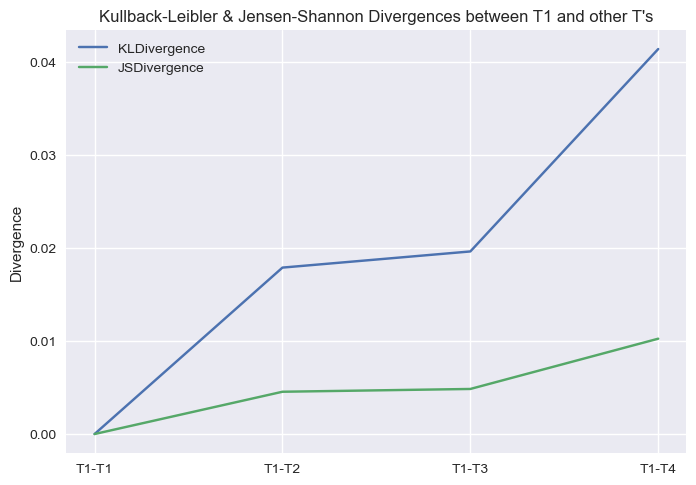

In [22]:
from collections import defaultdict

# Calcul des métriques de divergence (KL & JS)
div_results = defaultdict(list) # résultats = {méthode1: [div_T1-T1, div_T1-T2, ...], ...}

for div_method in [KLDivergence, JSDivergence]:
    method_name = div_method.__name__
    for Q in Q_list:
        div_value = div_method(P, Q)
        div_results[method_name].append(div_value)
    
    # Affichage des résultats dans un graphique
    x = np.arange(len(Q_list))
    sns.lineplot(x=x, y=div_results[method_name], label=method_name)
    plt.xticks(x, [f"T1-T{_+1}" for _ in x])

plt.ylabel("Divergence")
plt.title("Kullback-Leibler & Jensen-Shannon Divergences between T1 and other T's")
plt.show()

Le contraste relevé précédemment entre les données de différentes périodes se traduit ici par une augmentation de la divergence de `P` par rapport aux `Qs`, avec une déviation plus importante au cours du 4e trimestre. Il est toutefois important de relever que les valeurs observées (< 0.05) traduisent une différence peu alarmante.

## Dérive des variables numériques

### Observation des données

In [23]:
# Variables discretes et variables continues
is_integer = np.array([np.issubdtype(combined_df[feature], np.integer)
                       for feature in num_features])

int_features = num_features[is_integer]
float_features = num_features[~is_integer]

# Variables numériques par type (entier, réel)
sorted_num_features = np.concatenate([int_features, float_features])

print(len(int_features), "variables discretes")
print(len(float_features), "variables continues")

6 variables discretes
2 variables continues


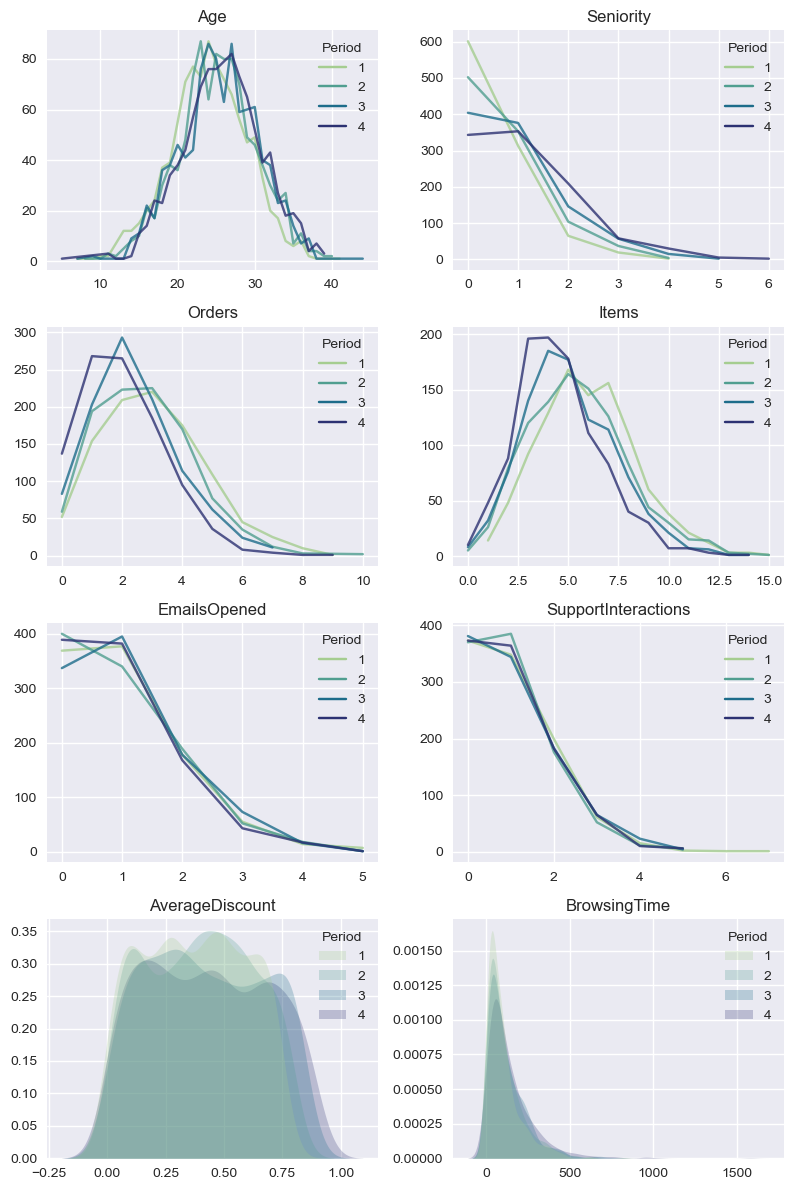

In [24]:
from itertools import product # produit cartésien
grid = list(product(range(4), range(2))) # 4x2 = 8 = 6+2

fig, ax = plt.subplots(4, 2, figsize=(8, 12))

for (i, j), feature in zip(grid, sorted_num_features):
    if i < 3: # variables discretes d'abord
        data = combined_df.groupby([feature, "Period"]).size().reset_index()
        sns.lineplot(data=data, x=feature, y=0, hue="Period",
                     alpha=.8, palette="crest", ax=ax[i, j])
    else: # variables continues ensuite
        lower, upper = min(combined_df[feature]), max(combined_df[feature])
        sns.kdeplot(data=combined_df, x=feature, hue="Period", common_norm=True,
                    fill=True, linewidth=0, palette="crest", ax=ax[i, j])
        
    ax[i, j].set(xlabel="", ylabel="", title=feature)

plt.tight_layout()
plt.show()

De manière globale, ces distributions de variables semblent être assez proches les unes des autres, tant au niveau de la forme que des valeurs. L'on note toutefois :
- Un léger décalage vers la droite des variables `Age` et `Seniority` qui pourrait s'expliquer aisément, étant donné que ces variables calquées sur le temps s'incrémentent de manière naturelle - bien entendu sous l'hypothèse que la base de clients concernée par l'étude est la même à quelques observations près.
- Un shift progressif vers la gauche, plus important cette fois, du nombre de commandes passées, traduisant une baisse de la demande de produits.

### Mesure de la dérive

In [25]:
# Calcul de la distance de Wasserstein
dist_results = defaultdict(list) # résultats = {feature1: [dist_T1-T1, dist_T1-T2, ...], ...}

P = None # distribution des variables au cours de T1
n = len(num_features) # nombre de variables quantitatives

_**NB** : Lors de la transformation des variables par le préprocesseur, les variables numériques sont standardisées, la variable qualitative est encodée, et la matrice issue de cette dernière opération est déplacée à la fin du jeu de données. Ainsi, l'array `prep_X` résultant de cette transformation a implicitement pour colonnes (dans cet ordre) :_

In [26]:
np.concatenate([num_features, df['TopCategory'].unique()])

array(['Age', 'Seniority', 'Orders', 'Items', 'AverageDiscount',
       'BrowsingTime', 'EmailsOpened', 'SupportInteractions',
       'Toys & Games', 'Electronics', 'Home & Kitchen',
       'Sports & outdoors', 'Health, Household & Baby Care',
       'Beauty & Personal Care', 'Clothing,Shoes & Jewelry',
       'Pet Supplies', 'Office Supplies'], dtype=object)

Ainsi, puisque le calcul de la **distance de Wasserstein** ne concerne que les variables quantitatives et qu'il est de plus conseillé de les normaliser suivant les paramètres de la période 0, nous ne récupérerons que les `n` premières colonnes des outputs prétraités. $(*)$

In [27]:
for i, df in enumerate(dfs):
    # Normalisation des données de chacune des périodes
    prepared = prepare(df)
    
    if prepared is not None:
        prep_X, _ = prepared
        
        # Sauvegarde des données de référence afin de permettre le calcul
        if i == 0: P = prep_X[:, :n] # (*)
        
        Q = prep_X[:, :n] # (*)
        
        # Calcul de la distance par période et par variable
        for j in range(n):
            dist_value = WassersteinDistance(P[:, j], Q[:, j])
            dist_results[num_features[j]].append(dist_value)
    else: break # arrêter en cas de problème

if len(dist_results) == n: # si aucun problème
    m = len(dfs)
    
    # Résultats
    dist_results = pd.DataFrame(dist_results, columns=num_features,
                                index=[f"T1-T{i+1}" for i in range(m)])
    
    display(dist_results)

,Age,Seniority,Orders,Items,AverageDiscount,BrowsingTime,EmailsOpened,SupportInteractions
T1-T1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
T1-T2,0.226421,0.589520,0.317025,0.300714,0.115604,0.177017,0.223063,0.233678
T1-T3,0.272722,0.879902,0.450940,0.414086,0.265712,0.291597,0.263932,0.188270
T1-T4,0.353690,1.127132,0.654011,0.638728,0.320564,0.656073,0.262040,0.160828


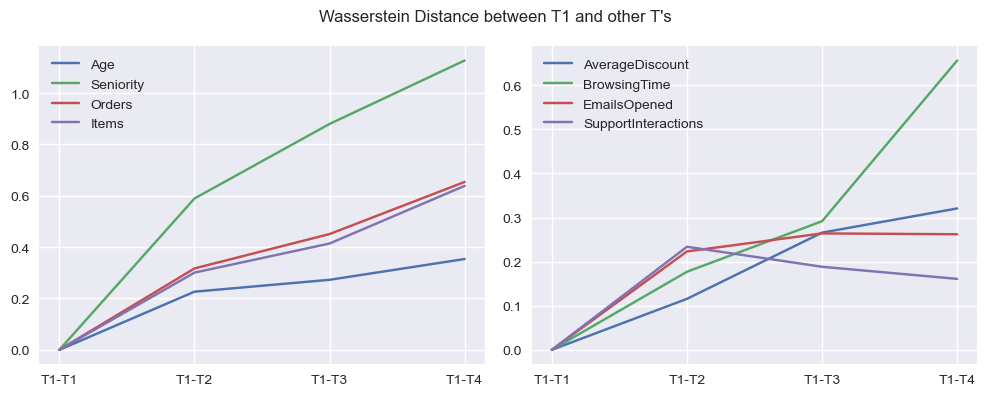

In [28]:
if 'm' in locals(): # si le précédent process s'est bien déroulé
    x = np.arange(m)

    # Représentation graphique
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    for i, feature in enumerate(num_features):
        # Pour des raisons d'esthétique, nous séparons en 2 graphiques...
        axis = ax[0] if i < 4 else ax[1]
        sns.lineplot(x=x, y=dist_results[feature], label=feature, ax=axis)
        axis.set_xticks(x, [f"T1-T{_+1}" for _ in x])
        axis.set_ylabel("")

    plt.suptitle("Wasserstein Distance between T1 and other T's")
    plt.tight_layout()
    plt.show()

Une fois de plus, nous observons un **accroissement généralisé des valeurs de notre métrique de dérive** indiquant un éloignement entre les nouvelles observations et les distributions d'origine. Quatre variables se démarquent en particulier en ce sens : `Seniority`, `Orders`, `Items` et  `BrowsingTime`, avec des valeurs entre 0.6 et 1.1, tandis que 0.35 est le maximum atteint par les autres variables. Un dernier constat que l'on avait jusque là pas eu l'occasion de relever, la distance de Wasserstein pour la variable `SupportInteractions` est en baisse pendant les deux derniers trimestres de l'année 2022. 

## Commentaire

Commençons par un récapitulatif :

- **Partie I : Entraînement et évaluation des modèles**
    * Afin d'adresser ce problème de régression, nous avons eu à entraîner et évaluer 3 modèles de Machine Learning sur les données de la période 0 (1er trimestre de l'année 2022) : (a) un modèle de Régression Linéaire, (b) un Random Forest et (c) un Perceptron Multi-Couche possédant 3 couches intermédiaires.
    * Le réseau de neurones s'est avéré être plus performant que les deux premiers modèles sur les données du trimestre 1.
    * Nous avons donc entraîné ce dernier sur l'ensemble des données de T1, puis nous l'avons évalué sur les données de T2, T3 et T4.
    * L'on a pu constater une dégradation continuelle des performances de ce modèle qui s'était pourtant bien ajusté aux données d'entraînement.

- **Partie II : Analyse de la dérive**
    * Plusieurs métriques d'évaluation nous ont été proposées dans ce cadre selon le type de variable : (a) la divergence de Kullback-Leibler et (b) sa version symétrique et lisse dite de Jensen-Shonnan pour les variables qualitatives, et (c) la distance de Wasserstein pour les variables quantitatives.
    * Avant de nous adonner au calcul de ces indicateurs, nous avons tenu à nous faire une idée de l'évolution des différentes distributions au moyen de graphes.
    * Force a été de constater que la plupart des variables étaient concernées par ce phénomène de dérive, mais à des degrés différents.
    * L'évaluation des précédentes métriques nous a ensuite permis de confirmer cette hypothèse issue de l'observation.

A cet égard, nous pensons que **les modifications subies par les données tout au long de l'année 2022, bien que minimes à l'échelle d'une seule variable, conduisent ensemble à la dérive de notre modèle, induisant ainsi un accroissement considérable de l'erreur de prédiction**. Une éventuelle solution consisterait en l'ajustement de la variable `Seniority` dont l'estimation de la déviation surpasse celle de toutes les autres. En effet, ses valeurs calquées sur le temps sont destinées à évoluer constamment tel qu'on a pu l'observer.